In [1]:
# Import and set anything you might need
import requests
import json
import base64
import hmac
import hashlib
import datetime, time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from datetime import date
d1 = date.today()
import logging
logging.basicConfig(filename="Gemini.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
logging.getLogger().setLevel(logging.INFO)

In [2]:
# Pull 24 Hour Change Data from Gemini

logging.info("INFO - API GET")
base_url = "https://api.gemini.com/v1"
response = requests.get(base_url + "/pricefeed")
prices = response.json()

print(prices)


[{'pair': 'SUSHIUSD', 'price': '9.1242', 'percentChange24h': '-0.0699'}, {'pair': 'UMAUSD', 'price': '17.3157', 'percentChange24h': '-0.0667'}, {'pair': 'DAIUSD', 'price': '1.00041', 'percentChange24h': '0.0002'}, {'pair': 'FTMUSD', 'price': '1.9842', 'percentChange24h': '-0.0780'}, {'pair': 'ETHDAI', 'price': '4143.19', 'percentChange24h': '-0.0113'}, {'pair': 'ZECUSD', 'price': '149.42', 'percentChange24h': '-0.0569'}, {'pair': 'LUNAUSD', 'price': '41.54', 'percentChange24h': '-0.0086'}, {'pair': 'LINKETH', 'price': '0.0067129', 'percentChange24h': '-0.0321'}, {'pair': 'BTCUSD', 'price': '58883.95', 'percentChange24h': '-0.0164'}, {'pair': 'ZECBTC', 'price': '0.00247', 'percentChange24h': '-0.0749'}, {'pair': 'SNXUSD', 'price': '8.4577', 'percentChange24h': '-0.0397'}, {'pair': 'CTXUSD', 'price': '14.0146', 'percentChange24h': '-0.0968'}, {'pair': 'STORJUSD', 'price': '2.16737', 'percentChange24h': '0.2887'}, {'pair': 'FETUSD', 'price': '0.7444', 'percentChange24h': '-0.0250'}, {'pai

In [3]:
# Check to see how the data looks
logging.info("INFO - Check to see how the data looks")
prices

[{'pair': 'SUSHIUSD', 'price': '9.1242', 'percentChange24h': '-0.0699'},
 {'pair': 'UMAUSD', 'price': '17.3157', 'percentChange24h': '-0.0667'},
 {'pair': 'DAIUSD', 'price': '1.00041', 'percentChange24h': '0.0002'},
 {'pair': 'FTMUSD', 'price': '1.9842', 'percentChange24h': '-0.0780'},
 {'pair': 'ETHDAI', 'price': '4143.19', 'percentChange24h': '-0.0113'},
 {'pair': 'ZECUSD', 'price': '149.42', 'percentChange24h': '-0.0569'},
 {'pair': 'LUNAUSD', 'price': '41.54', 'percentChange24h': '-0.0086'},
 {'pair': 'LINKETH', 'price': '0.0067129', 'percentChange24h': '-0.0321'},
 {'pair': 'BTCUSD', 'price': '58883.95', 'percentChange24h': '-0.0164'},
 {'pair': 'ZECBTC', 'price': '0.00247', 'percentChange24h': '-0.0749'},
 {'pair': 'SNXUSD', 'price': '8.4577', 'percentChange24h': '-0.0397'},
 {'pair': 'CTXUSD', 'price': '14.0146', 'percentChange24h': '-0.0968'},
 {'pair': 'STORJUSD', 'price': '2.16737', 'percentChange24h': '0.2887'},
 {'pair': 'FETUSD', 'price': '0.7444', 'percentChange24h': '-0.

In [4]:
# Convert the data into 2 different dataframes, and check the first couple.
logging.info("INFO - Convert the data into 2 different dataframes, and check the first couple.")
df_gain = pd.json_normalize(prices)
df_loss = pd.json_normalize(prices)
df_gain.head()

,pair,price,percentChange24h
0,SUSHIUSD,9.1242,-0.0699
1,UMAUSD,17.3157,-0.0667
2,DAIUSD,1.00041,0.0002
3,FTMUSD,1.9842,-0.0780
4,ETHDAI,4143.19,-0.0113


In [5]:
# Set all the 24 hour % change data as floats
logging.info("INFO - Set all the 24 hour % change data as floats.")
df_gain['percentChange24h'] = df_gain['percentChange24h'].astype(float)
df_loss['percentChange24h'] = df_gain['percentChange24h'].astype(float)

In [6]:
# Set 'x' to the absolute value of all 24 hour % change data 
logging.info("INFO - Set 'x' to the absolute value of all 24 hour % change data.")
x = abs(df_gain['percentChange24h'])
x

0     0.0699
1     0.0667
2     0.0002
3     0.0780
4     0.0113
       ...  
89    0.0471
90    0.0000
91    0.0474
92    0.0088
93    0.0331
Name: percentChange24h, Length: 94, dtype: float64

In [7]:
# Get a simple statistical breakdown of the 24 hour % change data
logging.info("INFO - Get a simple statistical breakdown of the 24 hour % change data")
x.describe()


count    94.000000
mean      0.049234
std       0.058811
min       0.000000
25%       0.015600
50%       0.034850
75%       0.061950
max       0.374000
Name: percentChange24h, dtype: float64

In [8]:
# Set x to the standard deviation of the 24 hour % change data
logging.info(f"INFO std")
x = x.describe()["std"]
x
logging.info(f"INFO std = {x}")

In [9]:
# Adjust the data frames to only show pairs below and about the std
logging.error(f"ERROR - The following coins are more than one standard deviation in growth from the total 24 hour % change {df_gain}")
logging.error(f"ERROR - The following coins are more than one standard deviation in growth from the total 24 hour % change {df_loss}")
logging.getLogger().setLevel(logging.ERROR)
df_gain = df_gain[df_gain.percentChange24h > x]
df_loss = df_loss[df_loss.percentChange24h < -x]


In [10]:
print(f"ALERT: The following coins are more than one standard deviation in growth from the total 24 hour % change for {d1}\n Standard Deviation - {x}%")
df_gain

ALERT: The following coins are more than one standard deviation in growth from the total 24 hour % change for 2021-11-18
 Standard Deviation - 0.05881061010482204%


,pair,price,percentChange24h
12,STORJUSD,2.16737,0.2887
30,AUDIOUSD,2.311,0.0754
33,RAREUSD,2.05,0.3740
40,ASHUSD,50,0.0962
60,MANAUSD,3.66793,0.1504
62,ENJUSD,3.0582,0.0629
74,CUBEUSD,17.4678,0.0716
76,SANDUSD,4.13405,0.2575


In [11]:
print(f"ALERT: The following coins are more than one standard deviation in loss from the total 24 hour % change for {d1}\n Standard Deviation - {x}%")
df_loss

ALERT: The following coins are more than one standard deviation in loss from the total 24 hour % change for 2021-11-18
 Standard Deviation - 0.05881061010482204%


,pair,price,percentChange24h
0,SUSHIUSD,9.1242,-0.0699
1,UMAUSD,17.3157,-0.0667
3,FTMUSD,1.9842,-0.0780
9,ZECBTC,0.00247,-0.0749
11,CTXUSD,14.0146,-0.0968
16,OXTUSD,0.52255,-0.0810
17,LRCUSD,2.29,-0.1244
19,MASKUSD,10.84,-0.0606
27,LTCUSD,214.7,-0.0624
37,LPTUSD,50.1735,-0.1198


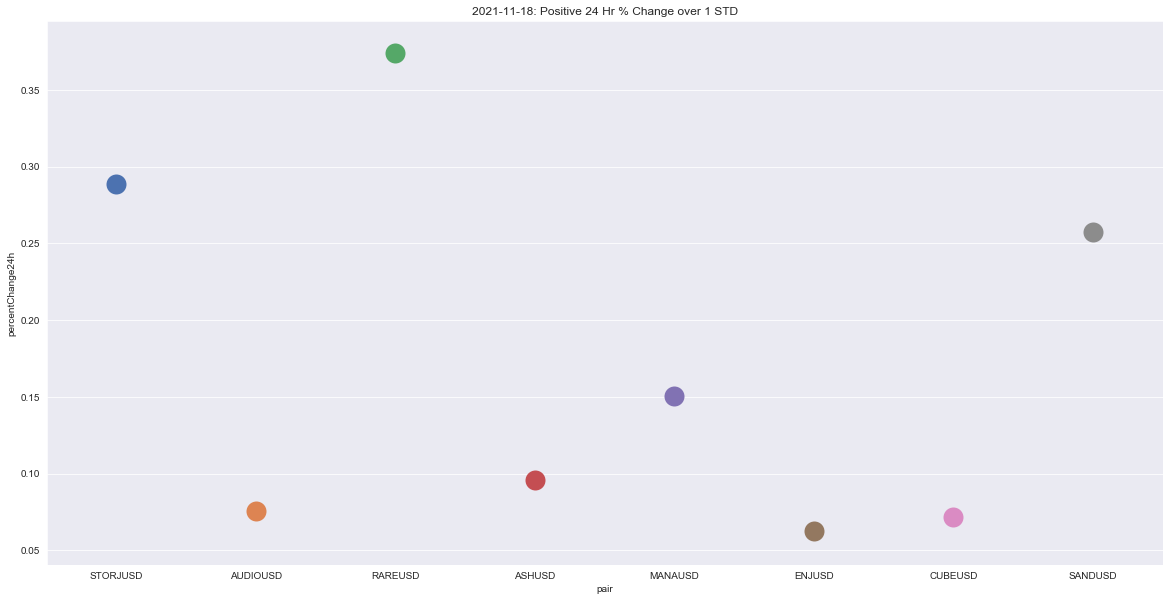

In [12]:
logging.error("ERROR - Scatterplot for Positive 24 Hr % Change over 1 STD")
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(20,10)
sns.swarmplot(x="pair", y="percentChange24h", data=df_gain, size=20, palette="deep").set(title=f'{d1}: Positive 24 Hr % Change over 1 STD')
plt.show()


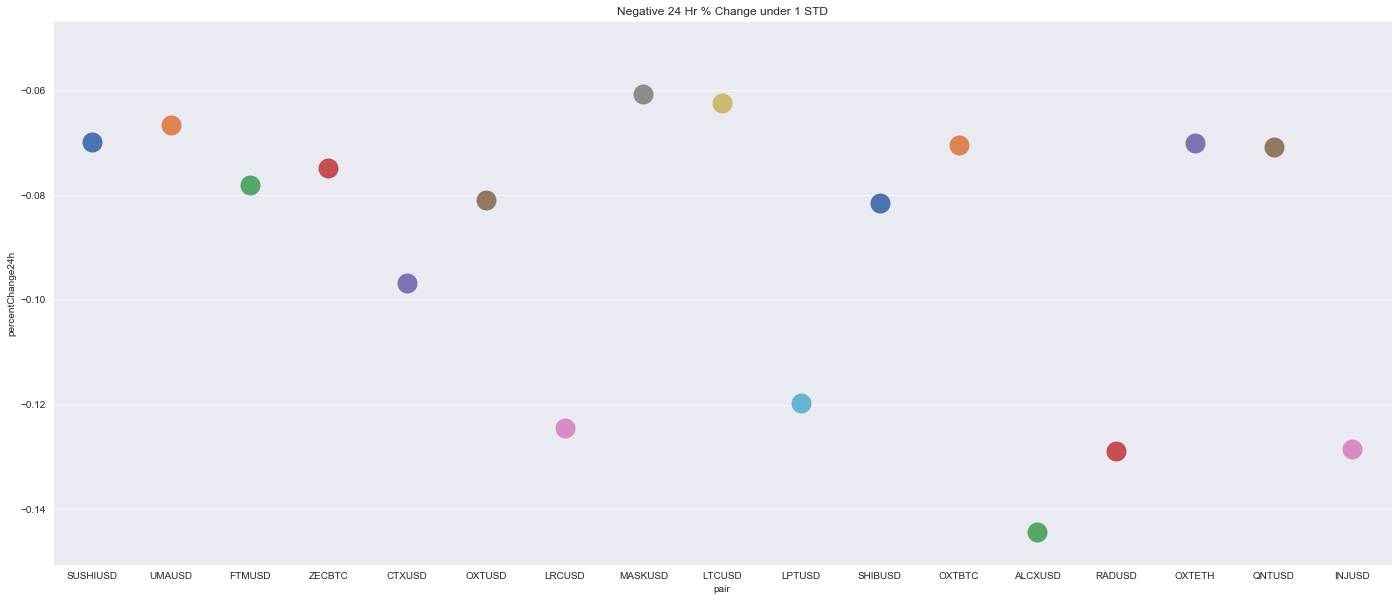

In [13]:
logging.error("ERROR - Scatterplot for Negative 24 Hr % Change under 1 STD")
sns.set_style("darkgrid")
fig = plt.gcf()
fig.set_size_inches(24,10)
sns.swarmplot(x="pair", y="percentChange24h", data=df_loss, size=20, palette="deep").set(title='Negative 24 Hr % Change under 1 STD')
plt.show()
